In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [3]:
PATH = 'data/'
!ls {PATH}

application_test.csv	     HomeCredit_columns_description.csv
application_test.csv.zip     installments_payments.csv
application_train.csv	     installments_payments.csv.zip
application_train.csv.zip    POS_CASH_balance.csv
bureau_balance.csv	     POS_CASH_balance.csv.zip
bureau_balance.csv.zip	     previous_application.csv
bureau.csv		     previous_application.csv.zip
bureau.csv.zip		     sample_submission.csv
credit_card_balance.csv      sample_submission.csv.zip
credit_card_balance.csv.zip  subm
df_pref			     tmp


In [4]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [5]:
def display_allRows(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 10):
            display(df)

In [20]:
df_app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_app = pd.read_csv(f'{PATH}application_train.csv', low_memory=False)

In [251]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df_bru = pd.read_csv(f'{PATH}bureau.csv')

In [235]:
df_bru.duplicated('SK_ID_CURR')

0          False
1           True
2           True
3           True
4           True
5           True
6           True
7          False
8           True
9           True
10          True
11          True
12          True
13         False
14         False
15          True
16          True
17          True
18          True
19          True
20          True
21         False
22          True
23          True
24          True
25          True
26          True
27         False
28          True
29          True
           ...  
1716398     True
1716399     True
1716400     True
1716401     True
1716402     True
1716403     True
1716404     True
1716405     True
1716406     True
1716407     True
1716408     True
1716409     True
1716410     True
1716411     True
1716412     True
1716413     True
1716414     True
1716415     True
1716416     True
1716417     True
1716418     True
1716419     True
1716420     True
1716421     True
1716422     True
1716423     True
1716424     True
1716425     Tr

In [69]:
df_tmp = df_bru.drop_duplicates('SK_ID_CURR')

In [70]:
df_tmp.shape

(305811, 17)

In [21]:
display_allRows(df_bru.transpose())

,0,1,2,3,4,...,1716423,1716424,1716425,1716426,1716427
SK_ID_CURR,215354,215354,215354,215354,215354,...,259355,100044,100044,246829,246829
SK_ID_BUREAU,5714462,5714463,5714464,5714465,5714466,...,5057750,5057754,5057762,5057770,5057778
CREDIT_ACTIVE,Closed,Active,Active,Active,Active,...,Active,Closed,Closed,Closed,Closed
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1,...,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-497,-208,-203,-203,-629,...,-44,-2648,-1809,-1878,-463
CREDIT_DAY_OVERDUE,0,0,0,0,0,...,0,0,0,0,0
DAYS_CREDIT_ENDDATE,-153,1075,528,NaN,1197,...,-30,-2433,-1628,-1513,NaN
DAYS_ENDDATE_FACT,-153,NaN,NaN,NaN,NaN,...,NaN,-2493,-970,-1513,-387
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,77674.5,...,0,5476.5,NaN,NaN,NaN
CNT_CREDIT_PROLONG,0,0,0,0,0,...,0,0,0,0,0


In [6]:
df_bruBl = pd.read_csv(f'{PATH}bureau_balance.csv')

In [10]:
display_all(df_bruBl.transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,27299425,27299426,27299427,27299428,27299429,27299430,27299431,27299432,27299433,27299434,27299435,27299436,27299437,27299438,27299439,27299440,27299441,27299442,27299443,27299444,27299445,27299446,27299447,27299448,27299449,27299450,27299451,27299452,27299453,27299454,27299455,27299456,27299457,27299458,27299459,27299460,27299461,27299462,27299463,27299464,27299465,27299466,27299467,27299468,27299469,27299470,27299471,27299472,27299473,27299474,27299475,27299476,27299477,27299478,27299479,27299480,27299481,27299482,27299483,27299484,27299485,27299486,27299487,27299488,27299489,27299490,27299491,27299492,27299493,27299494,27299495,27299496,27299497,27299498,27299499,27299500,27299501,27299502,27299503,27299504,27299505,27299506,27299507,27299508,27299509,27299510,27299511,27299512,27299513,27299514,27299515,27299516,27299517,27299518,27299519,27299520,27299521,27299522,27299523,27299524,27299525,27299526,27299527,27299528,27299529,27299530,27299531,27299532,27299533,27299534,27299535,27299536,27299537,27299538,27299539,27299540,27299541,27299542,27299543,27299544,27299545,27299546,27299547,27299548,27299549,27299550,27299551,27299552,27299553,27299554,27299555,27299556,27299557,27299558,27299559,27299560,27299561,27299562,27299563,27299564,27299565,27299566,27299567,27299568,27299569,27299570,27299571,27299572,27299573,27299574,27299575,27299576,27299577,27299578,27299579,27299580,27299581,27299582,27299583,27299584,27299585,27299586,27299587,27299588,27299589,27299590,27299591,27299592,27299593,27299594,27299595,27299596,27299597,27299598,27299599,27299600,27299601,27299602,27299603,27299604,27299605,27299606,27299607,27299608,27299609,27299610,27299611,27299612,27299613,27299614,27299615,27299616,27299617,27299618,27299619,27299620,27299621,27299622,27299623,27299624,27299625,27299626,27299627,27299628,27299629,27299630,27299631,27299632,27299633,27299634,27299635,27299636,27299637,27299638,27299639,27299640,27299641,27299642,27299643,27299644,27299645,27299646,27299647,27299648,27299649,27299650,27299651,27299652,27299653,27299654,27299655,27299656,27299657,27299658

In [7]:
df_bruAll = pd.merge(df_bruBl,df_bru, on='SK_ID_BUREAU', how='right')

In [9]:
display_all(df_bruAll)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,5715448,0.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
1,5715448,-1.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
2,5715448,-2.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
3,5715448,-3.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
4,5715448,-4.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
5,5715448,-5.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
6,5715448,-6.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
7,5715448,-7.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
8,5715448,-8.0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000
9,5715448,-9.0,0,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.000,0.000,67500.000,0.0,Credit card,-183,0.000


In [205]:
df_ccdBl = pd.read_csv(f'{PATH}credit_card_balance.csv')
#display_allRows(df_ccdBl.transpose())

In [214]:
#display_allRows(df_ccdBl.transpose())

,0,1,2,3,4,...,3840307,3840308,3840309,3840310,3840311
SK_ID_PREV,2562384,2582071,1740877,1389973,1891521,...,1036507,1714892,1302323,1624872,2411345
SK_ID_CURR,378907,363914,371185,337855,126868,...,328243,347207,215757,430337,236760
MONTHS_BALANCE,-6,-1,-7,-4,-1,...,-9,-9,-9,-10,-10
AMT_BALANCE,56.97,63975.6,31815.2,236572,453919,...,0,0,275785,0,0
AMT_CREDIT_LIMIT_ACTUAL,135000,45000,450000,225000,450000,...,45000,45000,585000,450000,157500
AMT_DRAWINGS_ATM_CURRENT,0,2250,0,2250,0,...,NaN,0,270000,NaN,0
AMT_DRAWINGS_CURRENT,877.5,2250,0,2250,11547,...,0,0,270000,0,0
AMT_DRAWINGS_OTHER_CURRENT,0,0,0,0,0,...,NaN,0,0,NaN,0
AMT_DRAWINGS_POS_CURRENT,877.5,0,0,0,11547,...,NaN,0,0,NaN,0
AMT_INST_MIN_REGULARITY,1700.33,2250,2250,11795.8,22924.9,...,0,0,2250,0,0


In [33]:
df_instpay = pd.read_csv(f'{PATH}installments_payments.csv')
display_allRows(df_instpay.transpose())

,0,1,2,3,4,...,13605396,13605397,13605398,13605399,13605400
SK_ID_PREV,1054186.00,1330831.000,2085231.0,2452527.00,2714724.000,...,2186857.0,1310347.0,1308766.000,1062206.0,2448869.00
SK_ID_CURR,161674.00,151639.000,193053.0,199697.00,167756.000,...,428057.0,414406.0,402199.000,409297.0,434321.00
NUM_INSTALMENT_VERSION,1.00,0.000,2.0,1.00,1.000,...,0.0,0.0,0.000,0.0,1.00
NUM_INSTALMENT_NUMBER,6.00,34.000,1.0,3.00,2.000,...,66.0,47.0,43.000,43.0,19.00
DAYS_INSTALMENT,-1180.00,-2156.000,-63.0,-2418.00,-1383.000,...,-1624.0,-1539.0,-7.000,-1986.0,-27.00
DAYS_ENTRY_PAYMENT,-1187.00,-2156.000,-63.0,-2426.00,-1366.000,...,NaN,NaN,NaN,NaN,NaN
AMT_INSTALMENT,6948.36,1716.525,25425.0,24350.13,2165.040,...,67.5,67.5,43737.435,67.5,11504.25
AMT_PAYMENT,6948.36,1716.525,25425.0,24350.13,2160.585,...,NaN,NaN,NaN,NaN,NaN


In [34]:
df_posCb = pd.read_csv(f'{PATH}POS_CASH_balance.csv')
display_allRows(df_posCb.transpose())

,0,1,2,3,4,...,10001353,10001354,10001355,10001356,10001357
SK_ID_PREV,1803195,1715348,1784872,1903291,2341044,...,2448283,1717234,1283126,1082516,1259607
SK_ID_CURR,182943,367990,397406,269225,334279,...,226558,141565,315695,450255,174278
MONTHS_BALANCE,-31,-33,-32,-35,-35,...,-20,-19,-21,-22,-52
CNT_INSTALMENT,48,36,12,48,36,...,6,12,10,12,16
CNT_INSTALMENT_FUTURE,45,35,9,42,35,...,0,0,0,0,0
NAME_CONTRACT_STATUS,Active,Active,Active,Active,Active,...,Active,Active,Active,Active,Completed
SK_DPD,0,0,0,0,0,...,843,602,609,614,0
SK_DPD_DEF,0,0,0,0,0,...,0,0,0,0,0


In [7]:
df_preApp = pd.read_csv(f'{PATH}previous_application.csv')
#display_allRows(df_preApp.transpose())

In [45]:
df_preApp.shape

(1670214, 37)

In [44]:
df_set0=df_preApp.drop_duplicates('SK_ID_CURR'); df_set0.shape

(338857, 37)

In [46]:
df_tmp=df_preApp.loc[df_preApp.duplicated('SK_ID_CURR'), :]

In [47]:
df_tmp.shape

(1331357, 37)

In [49]:
df_set1 = df_tmp.drop_duplicates('SK_ID_CURR');df_set1.shape

(278399, 37)

In [50]:
df_tmp = df_tmp.loc[df_tmp.duplicated('SK_ID_CURR')];df_tmp.shape

(1052958, 37)

In [52]:
df_set2 = df_tmp.drop_duplicates('SK_ID_CURR');df_set2.shape

(225662, 37)

In [53]:
df_set2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1013,2558815,319170,Cash loans,28745.055,675000.0,744498.0,NaN,675000.0,MONDAY,17,...,XNA,36.0,low_normal,Cash Street: low,365243.0,-564.0,486.0,-324.0,-317.0,0.0
1132,1319217,163545,Cash loans,67855.995,1260000.0,1333179.0,NaN,1260000.0,FRIDAY,13,...,XNA,24.0,low_action,Cash X-Sell: low,365243.0,-915.0,-225.0,-645.0,-642.0,1.0
2109,2576661,333682,Consumer loans,NaN,216000.0,216000.0,NaN,216000.0,SUNDAY,18,...,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
4593,1229545,213358,Cash loans,42237.180,229500.0,229500.0,NaN,229500.0,MONDAY,17,...,XNA,6.0,middle,Cash X-Sell: middle,365243.0,-768.0,-618.0,-708.0,-699.0,0.0
5112,2545732,358029,Cash loans,4386.690,67500.0,76410.0,NaN,67500.0,THURSDAY,13,...,XNA,24.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
dic = {x:x+'_set2' for x in df_set2.columns}
dic['SK_ID_CURR'] = 'SK_ID_CURR'

In [61]:
df_set2_r=df_set2.rename(dic,axis='columns');df_set2_r.head()

,SK_ID_PREV_set2,SK_ID_CURR,NAME_CONTRACT_TYPE_set2,AMT_ANNUITY_set2,AMT_APPLICATION_set2,AMT_CREDIT_set2,AMT_DOWN_PAYMENT_set2,AMT_GOODS_PRICE_set2,WEEKDAY_APPR_PROCESS_START_set2,HOUR_APPR_PROCESS_START_set2,...,NAME_SELLER_INDUSTRY_set2,CNT_PAYMENT_set2,NAME_YIELD_GROUP_set2,PRODUCT_COMBINATION_set2,DAYS_FIRST_DRAWING_set2,DAYS_FIRST_DUE_set2,DAYS_LAST_DUE_1ST_VERSION_set2,DAYS_LAST_DUE_set2,DAYS_TERMINATION_set2,NFLAG_INSURED_ON_APPROVAL_set2
1013,2558815,319170,Cash loans,28745.055,675000.0,744498.0,NaN,675000.0,MONDAY,17,...,XNA,36.0,low_normal,Cash Street: low,365243.0,-564.0,486.0,-324.0,-317.0,0.0
1132,1319217,163545,Cash loans,67855.995,1260000.0,1333179.0,NaN,1260000.0,FRIDAY,13,...,XNA,24.0,low_action,Cash X-Sell: low,365243.0,-915.0,-225.0,-645.0,-642.0,1.0
2109,2576661,333682,Consumer loans,NaN,216000.0,216000.0,NaN,216000.0,SUNDAY,18,...,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
4593,1229545,213358,Cash loans,42237.180,229500.0,229500.0,NaN,229500.0,MONDAY,17,...,XNA,6.0,middle,Cash X-Sell: middle,365243.0,-768.0,-618.0,-708.0,-699.0,0.0
5112,2545732,358029,Cash loans,4386.690,67500.0,76410.0,NaN,67500.0,THURSDAY,13,...,XNA,24.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
dic = {x:x+'_set1' for x in df_set1.columns}
dic['SK_ID_CURR'] = 'SK_ID_CURR'
df_set1_r = df_set1.rename(dic,axis='columns');df_set1_r.head()

,SK_ID_PREV_set1,SK_ID_CURR,NAME_CONTRACT_TYPE_set1,AMT_ANNUITY_set1,AMT_APPLICATION_set1,AMT_CREDIT_set1,AMT_DOWN_PAYMENT_set1,AMT_GOODS_PRICE_set1,WEEKDAY_APPR_PROCESS_START_set1,HOUR_APPR_PROCESS_START_set1,...,NAME_SELLER_INDUSTRY_set1,CNT_PAYMENT_set1,NAME_YIELD_GROUP_set1,PRODUCT_COMBINATION_set1,DAYS_FIRST_DRAWING_set1,DAYS_FIRST_DUE_set1,DAYS_LAST_DUE_1ST_VERSION_set1,DAYS_LAST_DUE_set1,DAYS_TERMINATION_set1,NFLAG_INSURED_ON_APPROVAL_set1
23,1172937,302212,Cash loans,39475.305,1129500.0,1277104.5,NaN,1129500.0,THURSDAY,5,...,XNA,54.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
115,2686051,101529,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
180,1630059,405785,Consumer loans,4550.535,28300.5,22617.0,6750.0,28300.5,FRIDAY,10,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-2005.0,-1855.0,-1855.0,-1851.0,0.0
217,1129372,203250,Cash loans,31952.205,495000.0,553806.0,NaN,495000.0,THURSDAY,10,...,XNA,36.0,high,Cash X-Sell: high,365243.0,-829.0,221.0,-769.0,-765.0,1.0
262,2562544,163961,Cash loans,29527.200,270000.0,270000.0,0.0,270000.0,WEDNESDAY,12,...,Consumer electronics,12.0,high,Cash Street: high,365243.0,-2307.0,-1977.0,-1977.0,-1969.0,0.0


In [134]:
dic = {x:x+'_set0' for x in df_set0.columns}
dic['SK_ID_CURR'] = 'SK_ID_CURR'
df_set0_r = df_set0.rename(dic,axis='columns');df_set0_r.head()

,SK_ID_PREV_set0,SK_ID_CURR,NAME_CONTRACT_TYPE_set0,AMT_ANNUITY_set0,AMT_APPLICATION_set0,AMT_CREDIT_set0,AMT_DOWN_PAYMENT_set0,AMT_GOODS_PRICE_set0,WEEKDAY_APPR_PROCESS_START_set0,HOUR_APPR_PROCESS_START_set0,...,NAME_SELLER_INDUSTRY_set0,CNT_PAYMENT_set0,NAME_YIELD_GROUP_set0,PRODUCT_COMBINATION_set0,DAYS_FIRST_DRAWING_set0,DAYS_FIRST_DUE_set0,DAYS_LAST_DUE_1ST_VERSION_set0,DAYS_LAST_DUE_set0,DAYS_TERMINATION_set0,NFLAG_INSURED_ON_APPROVAL_set0
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_cats(df_app)

In [11]:
display_all(df_app.isnull().sum().sort_index()/len(df_app))

AMT_ANNUITY                     0.000039
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.000904
AMT_INCOME_TOTAL                0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
APARTMENTS_AVG                  0.507497
APARTMENTS_MEDI                 0.507497
APARTMENTS_MODE                 0.507497
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_MODE               0.585160
CNT_CHILDREN                    0.000000
CNT_FAM_MEMBERS                 0.000007
CODE_GENDER                     0.000000
COMMONAREA_AVG                  0.698723
COMMONAREA_MEDI                 0.698723
COMMONAREA_MODE                 0.698723
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH 

In [17]:
os.makedirs('tmp', exist_ok=True)
df_app.to_feather('tmp/df_app')
!ls tmp

# Merge data

In [218]:
df_tmp = df_ccdBl.drop_duplicates('SK_ID_CURR')

In [80]:
#merge current and previous applications
#df_merge = pd.merge(df_app, df_set2_r, on='SK_ID_CURR', how='left')
#df_merge = pd.merge(df_merge, df_set1_r, on = 'SK_ID_CURR', how='left')
#df_merge = pd.merge(df_merge, df_set0_r, on = 'SK_ID_CURR', how='left')

#setT = df_app[['TARGET','SK_ID_CURR']]
#df_merge = pd.merge(setT, df_set0_r, on='SK_ID_CURR', how = 'left')
df_merge = pd.merge(df_app, df_tmp, on = 'SK_ID_CURR', how = 'left')

In [81]:
df_merge.shape

(307511, 154)

In [82]:
df_app.shape

(307511, 138)

In [83]:
df_merge.to_feather('tmp/df_merge')
!ls tmp

df_app	df_merge


# Learning

In [76]:
#df_merge = pd.read_feather('tmp/df_merge')
df_merge = pd.read_feather('tmp/df_merge')

In [84]:
train_cats(df_merge)
#train_cats(df_app)

In [85]:
df_merge.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY_x',
       ...
       'DAYS_ENDDATE_FACT_y', 'AMT_CREDIT_MAX_OVERDUE_y',
       'CNT_CREDIT_PROLONG_y', 'AMT_CREDIT_SUM_y', 'AMT_CREDIT_SUM_DEBT_y',
       'AMT_CREDIT_SUM_LIMIT_y', 'AMT_CREDIT_SUM_OVERDUE_y', 'CREDIT_TYPE_y',
       'DAYS_CREDIT_UPDATE_y', 'AMT_ANNUITY'],
      dtype='object', length=154)

In [86]:
df, y, nas = proc_df(df_merge,'TARGET')
#df, y, nas = proc_df(df_app,'TARGET')

In [87]:
df.shape

(307511, 240)

In [88]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 8000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_app, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((299511, 240), (299511,), (8000, 240), (8000,))

In [89]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [roc_auc_score(y_train, m.predict(X_train)), roc_auc_score(y_valid, m.predict(X_valid)),
          m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m,'oob_score_'): res.append(m.oob_score_)
    print(res)

In [90]:
set_rf_samples(10000) # use reset_rf_samples() to reset

# Feature Importance

In [91]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=3, max_features=0.5, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 37.9 s, sys: 3.27 s, total: 41.2 s
Wall time: 19.5 s
[0.75948615412313858, 0.69055909097535595, 0.084650184465631217, 0.00045395845433093829, 0.042955431848407444]


In [92]:
fi = rf_feat_importance(m,X_train); fi[:10]

,cols,imp
41,EXT_SOURCE_2,0.073771
42,EXT_SOURCE_3,0.061545
18,DAYS_REGISTRATION,0.034291
0,SK_ID_CURR,0.033971
16,DAYS_BIRTH,0.032808
19,DAYS_ID_PUBLISH,0.032192
94,DAYS_LAST_PHONE_CHANGE,0.029959
40,EXT_SOURCE_1,0.026559
17,DAYS_EMPLOYED,0.026370
8,AMT_ANNUITY_x,0.024187


In [93]:
def plot_fi(fi): return fi.plot('cols','imp','barh',figsize=(12,7), legend=False)

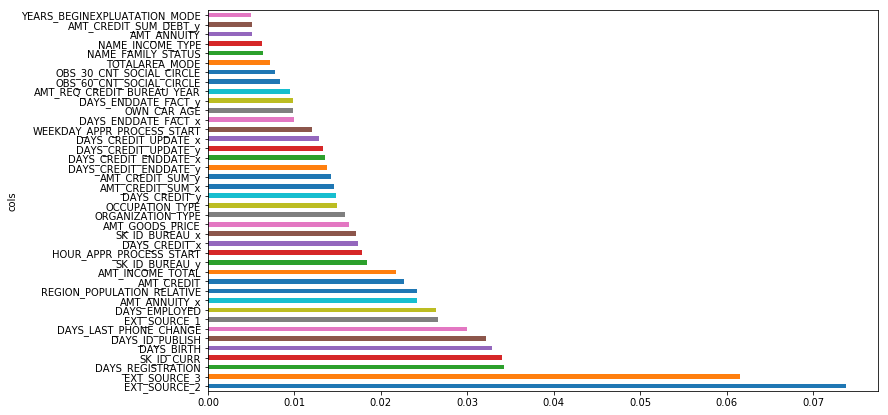

In [94]:
plot_fi(fi[:40])

In [97]:
to_keep = fi[fi.imp>0.01].cols; len(to_keep)

28

In [98]:
df_keep = df_merge[to_keep].copy()

In [99]:
df, _, nas = proc_df(df_keep)

In [100]:
df.shape

(307511, 44)

In [101]:
nas

{'AMT_ANNUITY_x': 24903.0,
 'AMT_CREDIT_SUM_x': 103954.05,
 'AMT_CREDIT_SUM_y': 103954.05,
 'AMT_GOODS_PRICE': 450000.0,
 'DAYS_CREDIT_ENDDATE_x': -459.0,
 'DAYS_CREDIT_ENDDATE_y': -459.0,
 'DAYS_CREDIT_UPDATE_x': -469.0,
 'DAYS_CREDIT_UPDATE_y': -469.0,
 'DAYS_CREDIT_x': -1072.0,
 'DAYS_CREDIT_y': -1072.0,
 'DAYS_LAST_PHONE_CHANGE': -757.0,
 'EXT_SOURCE_1': 0.5059979305057544,
 'EXT_SOURCE_2': 0.5659614260608526,
 'EXT_SOURCE_3': 0.5352762504724826,
 'SK_ID_BUREAU_x': 5855094.0,
 'SK_ID_BUREAU_y': 5855094.0}

In [102]:
X_train, X_valid = split_vals(df, n_trn)

In [103]:
df.shape

(307511, 44)

In [104]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                         n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.75831516497068019, 0.69633601552349922, 0.084258748187376775, -0.012077772174157619, 0.042877914223345193]


In [61]:
m = RandomForestRegressor(n_estimators=200, min_samples_leaf=3, max_features=0.5,
                         n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 46.6 s, sys: 2.92 s, total: 49.5 s
Wall time: 23 s
[0.78551803356573946, 0.71696257357963267, 0.09898450144030202, 0.022618185669666779, 0.05839358982773668]


# More Learning

In [62]:
m = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 16s, sys: 2.8 s, total: 1min 19s
Wall time: 26.5 s
[0.77157661216206452, 0.72152971656515164, 0.090866644596874768, 0.032860114491392478, 0.059360717040133126]


In [66]:
m = RandomForestRegressor(n_estimators=200, min_samples_leaf=10, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 7s, sys: 2.94 s, total: 1min 10s
Wall time: 25.1 s
[0.76066171206895783, 0.72674646438074519, 0.083296154897260277, 0.055533014039282791, 0.063537527397940163]


In [67]:
m = RandomForestRegressor(n_estimators=300, min_samples_leaf=10, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 39s, sys: 4.28 s, total: 1min 44s
Wall time: 37.1 s
[0.76167176569289552, 0.72917277269096537, 0.084193618248117774, 0.055738419531575316, 0.064511872572515228]


# Test set

In [71]:
df_app_test = pd.read_csv(f'{PATH}application_test.csv', low_memory=False)

In [72]:
df_merge_test = pd.merge(df_app_test, df_tmp, on='SK_ID_CURR', how='left')

In [73]:
df_app_test.shape

(48744, 121)

In [74]:
df_merge_test.shape

(48744, 137)

In [75]:
df_test_fi = df_app_test[to_keep].copy()

KeyError: "['AMT_ANNUITY_x' 'SK_ID_BUREAU' 'DAYS_CREDIT' 'AMT_CREDIT_SUM' 'DAYS_CREDIT_ENDDATE' 'DAYS_CREDIT_UPDATE'\n 'DAYS_ENDDATE_FACT' 'AMT_CREDIT_SUM_DEBT'] not in index"

In [115]:
X_train.shape

(299511, 19)

In [159]:
train_cats(X_train)

In [160]:
apply_cats(df_test_fi,X_train)

In [118]:
df_test_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 19 columns):
EXT_SOURCE_2                  48736 non-null float64
EXT_SOURCE_3                  40076 non-null float64
DAYS_BIRTH                    48744 non-null int64
DAYS_ID_PUBLISH               48744 non-null int64
DAYS_REGISTRATION             48744 non-null float64
SK_ID_CURR                    48744 non-null int64
DAYS_EMPLOYED                 48744 non-null int64
DAYS_LAST_PHONE_CHANGE        48744 non-null float64
AMT_ANNUITY                   48720 non-null float64
REGION_POPULATION_RELATIVE    48744 non-null float64
EXT_SOURCE_1                  28212 non-null float64
AMT_CREDIT                    48744 non-null float64
AMT_INCOME_TOTAL              48744 non-null float64
AMT_GOODS_PRICE               48744 non-null float64
HOUR_APPR_PROCESS_START       48744 non-null int64
ORGANIZATION_TYPE             48744 non-null object
OCCUPATION_TYPE               33139 non-null object
WE

In [161]:
nas

{'AMT_ANNUITY': 24903.0,
 'AMT_GOODS_PRICE': 450000.0,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 1.0,
 'DAYS_LAST_PHONE_CHANGE': -757.0,
 'EXT_SOURCE_1': 0.5059979305057544,
 'EXT_SOURCE_2': 0.5659614260608526,
 'EXT_SOURCE_3': 0.5352762504724826}

In [140]:
display_allRows(df_test_fi.transpose())

,0,1,2,3,4,...,48739,48740,48741,48742,48743
EXT_SOURCE_2,0.789654,0.291656,0.699787,0.509677,0.425687,...,0.648575,0.684596,0.63277,0.445701,0.456541
EXT_SOURCE_3,0.15952,0.432962,0.610991,0.612704,NaN,...,0.643026,NaN,0.283712,0.595456,0.272134
DAYS_BIRTH,-19241,-18064,-20038,-13976,-13040,...,-19970,-11186,-15922,-13968,-13962
DAYS_ID_PUBLISH,-812,-1623,-3503,-4208,-4262,...,-3399,-3003,-1504,-1364,-4220
DAYS_REGISTRATION,-5170,-9118,-2175,-2000,-4000,...,-9094,-3015,-2681,-1461,-1072
SK_ID_CURR,100001,100005,100013,100028,100038,...,456221,456222,456223,456224,456250
DAYS_EMPLOYED,-2329,-4469,-4458,-1866,-2191,...,-5169,-1149,-3037,-2731,-633
DAYS_LAST_PHONE_CHANGE,-1740,0,-856,-1805,-821,...,-684,0,-838,-2308,-327
AMT_ANNUITY,20560.5,17370,69777,49018.5,32067,...,17473.5,31909.5,33205.5,25128,24709.5
REGION_POPULATION_RELATIVE,0.01885,0.035792,0.019101,0.026392,0.010032,...,0.002042,0.035792,0.026392,0.01885,0.006629


In [163]:
df_test_fi['ORGANIZATION_TYPE'] = df_test_fi['ORGANIZATION_TYPE'].astype('category')
df_test_fi['WEEKDAY_APPR_PROCESS_START'] = df_test_fi['WEEKDAY_APPR_PROCESS_START'].astype('category')
df_test_fi['OCCUPATION_TYPE'] = df_test_fi['OCCUPATION_TYPE'].astype('category')

In [144]:
df_test_fi.shape

(48744, 19)

In [164]:
#df, y, nas = proc_df(df_app,'TARGET')

df_test,a,b = proc_df(df_test_fi,na_dict=nas) #passing in na_dict make sure the missing value columns aligns with training set

In [165]:
df_test.shape

(48744, 26)

In [178]:
predict = m.predict(df_test)

In [179]:
predict

array([ 0.11081,  0.12697,  0.05539, ...,  0.07217,  0.10282,  0.17919])

In [180]:
df_pred = pd.DataFrame(predict)

In [181]:
df_pred.insert(0,'SK_ID_CURR',df_app_test['SK_ID_CURR'])

In [182]:
df_pred.rename({0:'TARGET'},axis='columns',inplace=True)

In [183]:
df_pred.head()

,SK_ID_CURR,TARGET
0,100001,0.110806
1,100005,0.126972
2,100013,0.055389
3,100028,0.076194
4,100038,0.191528


In [184]:
df_pred.to_feather(f'{PATH}df_pref')

In [185]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df_pred.to_csv(f'{SUBM}subm.csv', index = False)
FileLink(f'{SUBM}subm.csv')

/home/paperspace/kaggle/competitions/home-credit-default-risk/data/subm/subm.csv